In [ ]:
%pip install imblearn
%pip install seaborn
%pip install yellowbrick

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")
#file read test 코드입니다.

학년 특성만 추출하여 읽은 데이터에서 가장 빈도가 높은 학년을 시각화하여 분석

data['학년'].value_counts()는 데이터에서 '학년' 열의 각 값들의 빈도를 계산. 즉, 각 학년이 몇 번 등장했는지를 count

plt.figure(figsize=(10,7))는 그래프의 크기를 설정합니다. 가로로 10인치, 세로로 7인치 set

sns.barplot(x=top[:5].index,y=top[:5].values)는 seaborn 라이브러리를 사용하여 막대 그래프를 그립니다. x축에는 상위 5개의 학년을, y축에는 해당 학년의 빈도

plt.xticks(rotation=45)는 x축 눈금 라벨을 45도 각도로 회전하여 보기 편하게 만듬

plt.title('Top genres',color = 'blue')는 그래프의 제목을 설정합니다. 이 경우에는 'Top genres'로 설정되었고, 글자 색상은 파란색으로 지정되었습니다.

따라서 아래 코드를 실행하면, 데이터에서 가장 빈도가 높은 상위 5개의 학년이 막대 그래프로 시각화되며, 각 학년의 빈도를 쉽게 파악할 수 있습니다.

In [ ]:
import seaborn as sns

top = data['학년'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

## 테스트용 2022년 데이터를 기반한 학년별 분포 분석입니다.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer

# 데이터 로드
data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")

# 전처리 파이프라인 정의
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # 결측치 평균값으로 대체
    ('scaler', StandardScaler())  # 데이터 정규화
])


# 성별을 0과 1로 변환
data['성별'] = data['성별'].replace({'여': 0, '남': 1})


# 전처리 및 클러스터링에 사용할 특성 선택
features = data[['학년', '반', '순번']]
# 전처리 수행
preprocessed_features = preprocessing_pipeline.fit_transform(features)

# K-means 클러스터링 모델 정의
kmeans = KMeans(random_state=42)

# 엘보우 방법을 사용하여 최적의 클러스터 수 결정
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(preprocessed_features)
visualizer.show()

# 최적의 클러스터 수를 결정하여 클러스터링 수행
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(preprocessed_features)

# 클러스터링 결과 출력
clusters = kmeans.labels_
print(clusters)


위 클러스터 결과를 보면 features = data[['학년', '반', '순번']] 특성을 선택했을때,  왜곡(distortion)이 급격히 감소하는 지점 발생.
여기서 k=4에서 elbow 지점이 나타나고, elbow 지점 이후에는 감소율이 둔화되는 것으로 보입니다. 이는 클러스터 수를 4로 설정했을 때 데이터를 잘 설명할 수 있음

/tmp/ipykernel_2076/1866886355.py:10: DtypeWarning: Columns (43,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv", encoding='utf-8')


UTF-8 인코딩으로 읽기 성공
CP949 인코딩으로 읽기 실패


/tmp/ipykernel_2076/1866886355.py:24: DtypeWarning: Columns (43,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")
/tmp/ipykernel_2076/1866886355.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['성별'] = data['성별'].replace({'여': 0, '남': 1})
/tmp/ipykernel_2076/1866886355.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['손씻기', '양치질']] = imputer.fit_transform(features[['손씻기', '양치질']])


     Cluster
학년          
1   4.208245
2   4.046761
3   3.758178
4   3.197889
5   3.596148
6   3.735472


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

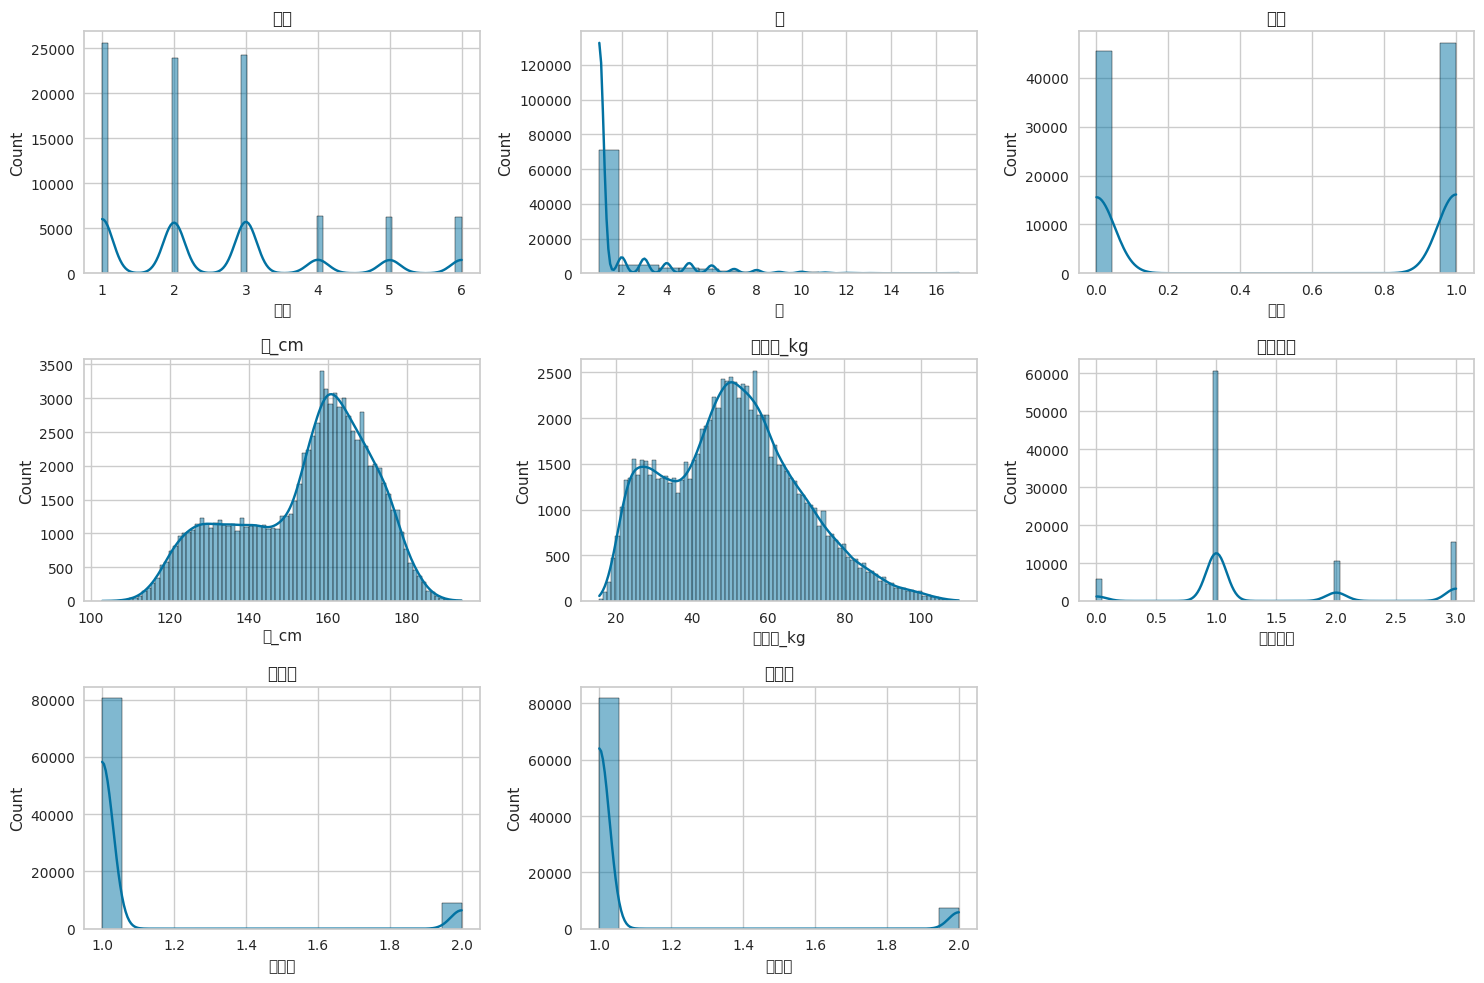

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")

# 성별을 0과 1로 변환
data['성별'] = data['성별'].replace({'여': 0, '남': 1})

# 비만 여부를 숫자로 변환
obesity_mapping = {'저체중': 0, '정상체중': 1, '과체중': 2, '비만': 3}
data['비만여부'] = data['비만여부'].map(obesity_mapping)

# 클러스터링을 위한 특성 선택
features = data[['학년', '반', '순번', '성별', '키_cm', '몸무게_kg', '비만여부', '손씻기', '양치질']]


# 빈 데이터 공간이 있을수 있어 NaN 값을 최빈값으로 대체하는 SimpleImputer 객체 생성
imputer = SimpleImputer(strategy='most_frequent')

# '손씻기'와 '양치질' 열의 NaN 값을 대체
features[['손씻기', '양치질']] = imputer.fit_transform(features[['손씻기', '양치질']])

# 클러스터링 수행
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(features)

# 결과 확인
data['Cluster'] = clusters
print(data[['학년', 'Cluster']].groupby('학년').mean())

#빈 컬럼을 찾아내기 위한 테스트 코드
#print(features.isnull().sum())


# 데이터 분포 시각화
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['학년', '반', '성별', '키_cm', '몸무게_kg', '비만여부', '손씻기', '양치질']):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()
